# Т распределение

Изученные ранее в блоке первой недели свойства нормального или Гауссовского распределение использовались при вычислении z критерия для отклонения/принятия статистических гипотез, построения доверительных интервалов и тд, при условии, что размер выборки составлял больше 30. 
Также, было изучено, что согласно центральной предельной теореме, распределение средних, вычисленных для выборок из ГС, распределенной КАК УОДНО, будет иметь нормальное распределение с 0 математическим ожиданием, тоже самое работает и для распределения z критерия этой величины. Рассмотрим это ниже

In [1]:
import math
from scipy import stats
import numpy as np
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 6
#%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
PATH = "/Users/daria/stepikcourse/"

Создадим генеральную совокупность из псведослучайных величин со значениеями от 0 до 1000 объемом 100 000 \
Также зададим массив нормально распределенной величины


In [2]:
gen_unif_populetion = [random.randint(0,1000) for i in range(0, 1000000)]
norm_distrib = stats.norm.rvs(loc=0, scale=1, size=100000, random_state=True)

In [3]:
gen_mean = np.mean(gen_unif_populetion) # среднее ГС

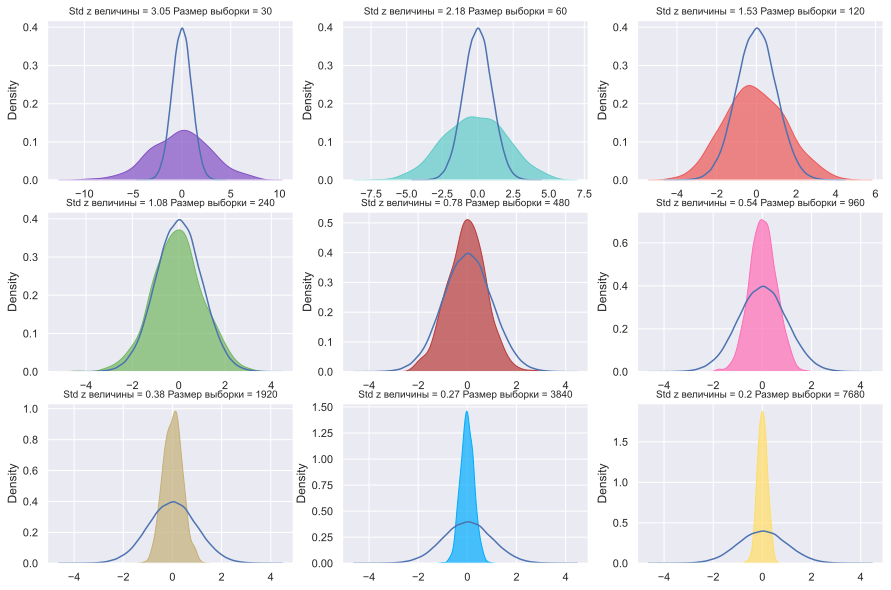

In [4]:
def distplot(volume, step):
    """
    Функция построения 9 графиков распределения z величины
    """
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15, 10)) # зададим 9 областей рисования
    color_bar = ['#8250C4', '#5ECBC8', '#EB5757', '#73B761', '#B73A3A', '#FE6DB6', '#C4B078', '#00ACFC', '#FD6']
    col = 0
    for i in range(0,3):

        for k in range(0,3):
            """Семплируем генеральную совокупность gen_unif_populetion 1000 раз с объемом от volume на первой итерации
            до volume*step^9 на последней"""

            samples = [[random.choice(gen_unif_populetion) for i in range(0, volume)] for i in range(0, 1000)] 

            """Генератором списком вычисляем массив z критериев для 1000 выборок с объемом от volume на первой итерации
            до volume*step^9 на последней"""

            z_list = [(np.mean(j) - gen_mean)/(np.std(j, ddof=1)**(1/2)) for j in samples]

            """Построим график распределение z критерия"""

            sns.kdeplot(z_list, shade=True, color=color_bar[col], label="Cyl=1", alpha=.7, ax=ax[i,k])

            """Наложим на него график нормального распределения с 0 мат ожиданием и стандартным отклонением = 1"""

            sns.kdeplot(norm_distrib, ax=ax[i,k])        
            ax[i][k].set_title(f'Std z величины = {round(np.std(z_list), 2)} Размер выборки = {str(volume)}', fontsize = 10)
            volume *= step
            col += 1
            
distplot(30,2)

На приведенных выше графиках видно, при увеличении размера выборки z-критерий сужается, среднее каждой выборки все ближе расположено к среднему генеральной совокпуности, что в свою очередь "обнуляет" числител в формуле z-критерия (X-u), где u-среднее ГС, а Х-среднее выборки.Также, полагаю, что Анатолий Карпов в своем курсе допустил небольшую неточность на 7 слайде блока 2.1 "то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице." - стандартное отклонение z критерия будет уменьшаться с увеличением размера выборок, что наглядно продемонстрировано на графиках (с увеличением размера выборок "купол" сужается, ширина которого как раз и определяется стандартным отклонением). 

Важно отметить, что для расчета z критерия при вычислении стандартной ошибки среднего (знаменатель формулы z-критерия) мы использовали стандартное отклонение выборки, делая допущение, что для выборок достаточно большого размера (n>30) стандартное отклонение будет близким к стандартному отклонению генеральной совокупности. Используя это допущение, мы вычисляли z критерий и далее по свойствам нормального распределения строились доверительные интервалы, вычисляли уровни значимости и проверяли гипотезы и тд. 

Однако, использование стандартного отклонения выборки для вычисления критерия (в случае t распределения это t критерий) также работает и для выборок размером меньше 30, но для решения своих задач будут уже использоваться свойства t распределения. Свойства нормального распределения при размере выборки больше 30 использовались для упрощения, но как упомянает Анатолий Карпов, этот подход не совсем верен и часто критикуется, он был актуален в до компьютерную эпоху, когда использование t распределение для больших выборок было затруднительным. В наше время вычислить все необходимые показатели даже при выборках более 30 (100, 1000, это уже не имеет значения) не составляет труда. Да, при больших выборках t распределение стремится к нормальному, но для чистоты вычислений, мы теперь всегда будем использовать именно t распредление и t критерий. 

Форма распределения Т распределения или распределения Стьюдента определяется числом степеней свободы - df. Зададим такое распределение 

<AxesSubplot:ylabel='Density'>

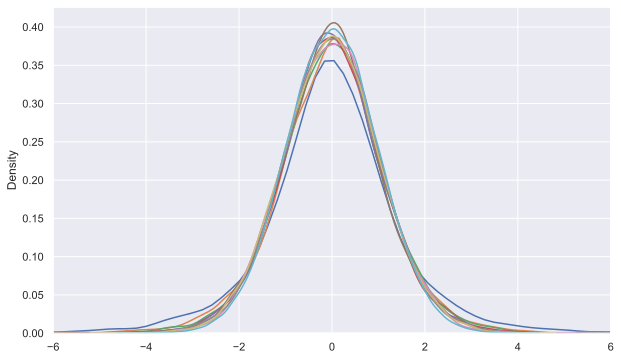

In [58]:
fig, ax = plt.subplots()

r = [stats.t.rvs(i, size=10000) for i in np.arange(3,30,3)]
for i in r:
    sns.kdeplot(i) 
    plt.xlim(-6, 6)
    
sns.kdeplot(norm_distrib)

На графике выше мы можем наблюдать, что распределения с меньшим кол-вом степеней свободы имеют более "длинные" хвосты. Это связно с тем, что чем меньше степень свободы (размер выборки) тем большее кол-во значений лежит за пределами 2-ух сигм

Вернемся к вопросу требований данных для использования t критерия Стьюдента. Как упомяналось выше, требования к иходной ГС не включают в себя нормальность распределения!(https://koch-kir.medium.com/%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D0%BC%D0%B0%D0%BD%D0%B0-%D0%B8%D0%BB%D0%B8-%D1%82%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8E-%D0%B2-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-55139a5558d) Об этом всколзь упомянул Анатолий в своем курсе, однако это очень важный момент т. к. в большом кол-ве русскоязычных источников отмечается, что для этого критерия необходимо нормальное распределение ГС